In [2]:
!pip install pandas

In [4]:
!pip install numpy

In [6]:
!pip install seaborn

In [7]:
import warnings 


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.metrics import accuracy_score, classification_report 
from termcolor import colored 
from scipy.stats import skew,kurtosis

warnings.filterwarnings('ignore')

In [9]:
house_price = pd.read_csv("C:\\Users\\sarat\\Downloads\\house_price.csv")
print(house_price)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0                3699  
1                4615  
2  

In [10]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [11]:
house_price.describe(include=object)

,location,size
count,13200,13200
unique,241,31
top,other,2 BHK
freq,2872,5192


In [12]:
house_price.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
total_sqft,13200.0,1555.30,1237.32,1.0,1100.0,1275.00,1672.0,52272.0
bath,13200.0,2.69,1.34,1.0,2.0,2.00,3.0,40.0
price,13200.0,112.28,149.18,8.0,50.0,71.85,120.0,3600.0
bhk,13200.0,2.80,1.29,1.0,2.0,3.00,3.0,43.0
price_per_sqft,13200.0,7920.34,106727.16,267.0,4267.0,5438.00,7317.0,12000000.0


In [13]:
house_price.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [14]:
house_price.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [15]:
house_price.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


In [16]:
house_price['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
house_price["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [18]:
house_price['bhk'].value_counts()

bhk
2     5517
3     4818
4     1390
1      640
5      349
6      220
7      100
8       88
9       52
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: count, dtype: int64

In [19]:
house_price['size'].value_counts()

size
2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

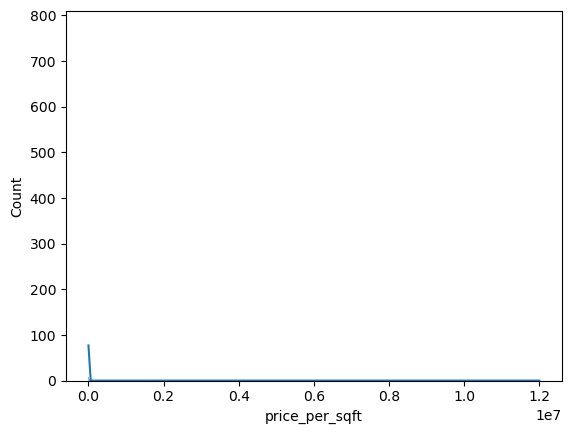

In [20]:
sns.histplot(data=house_price,x="price_per_sqft", kde=True)
plt.show()

In [21]:
house_price['price_per_sqft'].skew()
house_price['price_per_sqft'].kurtosis()
house_price['log_pps']=np.log(house_price["price_per_sqft"])
house_price['log_pps']

0        8.215818
1        8.437067
2        8.367532
3        8.739536
4        8.354674
           ...   
13195    8.808220
13196    9.315691
13197    8.567506
13198    9.250234
13199    8.035926
Name: log_pps, Length: 13200, dtype: float64

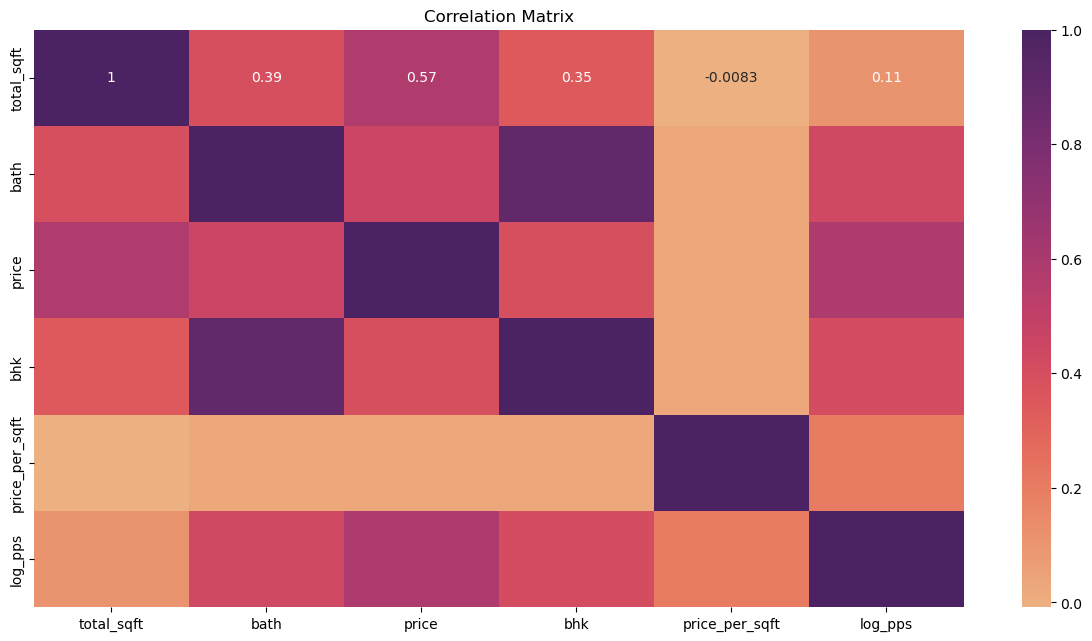

In [22]:
correlation_matrix = house_price.corr(numeric_only=True)
plt.figure(figsize=(15, 7.5))
sns.heatmap(correlation_matrix, annot=True, cmap='flare') # annot: write the data value in each cell
plt.title('Correlation Matrix')
plt.show()

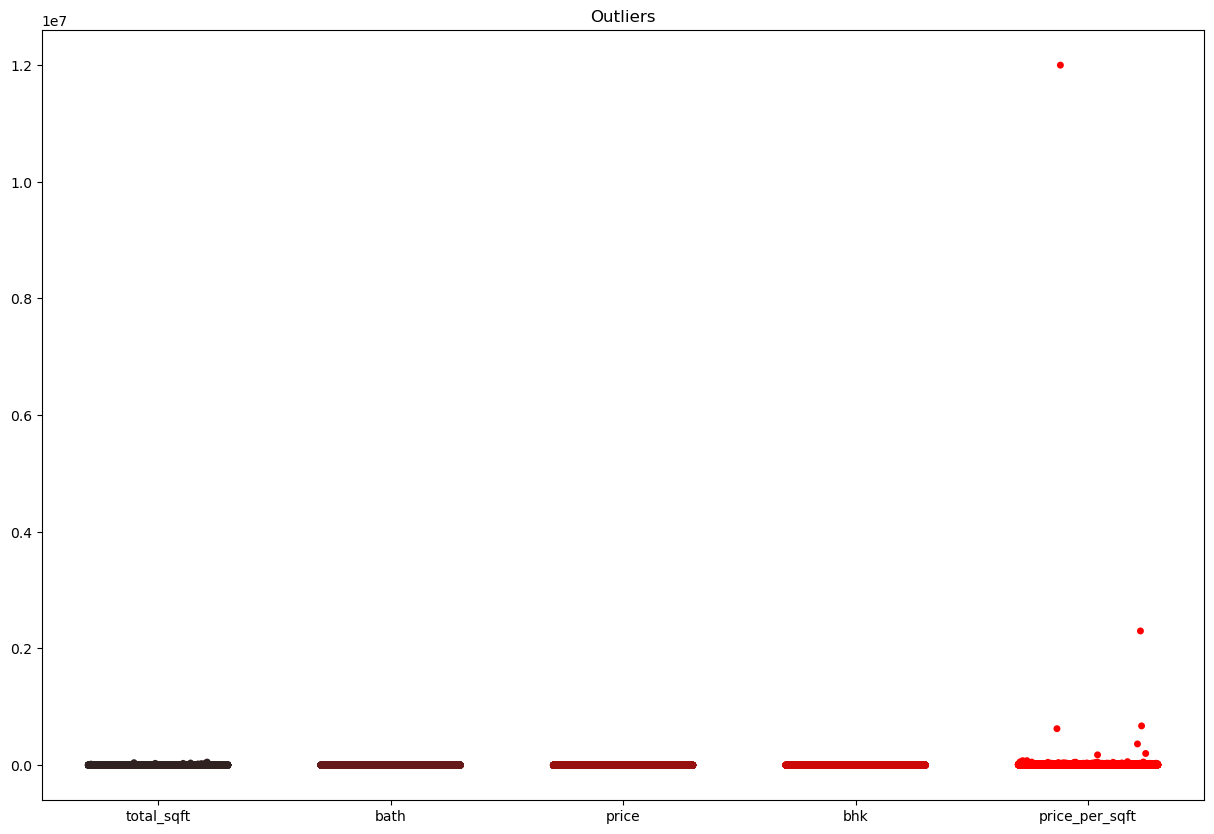

In [23]:

plt.figure(figsize=(15, 10))


outliersColumns = house_price.get(["total_sqft", "bath", "price", "bhk","price_per_sqft"])


sns.stripplot(data=outliersColumns, color="red", jitter=0.3, size=5)


plt.title("Outliers")


plt.show()